# # Análise da influência de fatores sociais e econômicos na inadimplência de clientes bancários

O objetivo deste estudo é entender os fatores mais prováveis que causam um cliente a ser inadimplente em relação a uma dívida bancária. Esses fatores incluem salário, escolaridade e movimentação financeira. Para isso utilizaremos uma base de dados que contém informações sobre clientes de uma instituição financeira, tais como idade, sexo, escolaridade, salário anual, movimentação financeira, e status como adimplente ou inadimplente. 

Utilizamos a biblioteca Pandas para manipulação de tabelas; Seaborn e Matplotlib para a visualização dos dados:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Iniciamos carregando o arquivo .csv em um DataFrame:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

# Visão Geral dos Dados

Vamos exibir as primeiras linhas do DataFrame para uma análise visual do formato desses dados:

In [3]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [4]:
df.shape #Retorna uma tupla com o número total de linhas e colunas do DataFrame

(10127, 16)

A coluna 'default' representa o status do cliente como adimplente (default=0) ou inadimplente (default=1). Em uma breve análise quantitativa, podemos calcular a porcentagem dessas duas ocorrências:

In [5]:
df[df['default'] == 0].shape #Número de linhas e colunas dos clientes adimplentes.

(8500, 16)

In [6]:
df[df['default'] == 1].shape #Número de linhas e colunas dos clientes inadimplentes.

(1627, 16)

Nesse caso, o número de colunas não nos é de interesse, então desempacotamos as tuplas descartando o número de colunas para calcular a proporção apenas das linhas:

In [7]:
qtd_total, _ = df.shape #Número total de clientes
qtd_adimplentes, _ = df[df['default'] == 0].shape #Número de clientes adimplentes
qtd_inadimplentes, _ = df[df['default'] == 1].shape #Número de clientes inadimplentes

porcentagem_adimp = round(100 * qtd_adimplentes / qtd_total, 2) #Porcentagem adimplentes
porcentagem_inadimp = round(100 * qtd_inadimplentes / qtd_total, 2) #Porcentagem inadimplentes

print(f"A proporcão clientes adimplentes é de {porcentagem_adimp}%")
print(f"A proporcão clientes inadimplentes é de {porcentagem_inadimp}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Agora vamos analisar a qualidade dos dados através de uma rápida visualização:

In [8]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Podemos ver que existem dados de tipos variados. Nossas colunas de interesse devem ser numéricas a fim de que possamos realizar análises gráficas comparativas. Vamos conferir qual o tipo de dado em cada coluna:

In [9]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Alguns dados são numéricos (int64) enquanto outros são strings (object). Além disso as colunas "limite_credito" e "valor_transacoes_12m" estão com os dados no formato incorreto, e consequentemente o valor que deveria ser numérico está sendo interpretado como uma string. Iremos corrigir esses dados nos próximos passos. Vamos obter mais estatísticas usando o método 'describe' para cada tipo de dados, separadamente:

In [10]:
df.select_dtypes('object').describe().transpose() #Descrição dos dados das strings

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [11]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() #Descrição dos dados numéricos, excluindo a chave id

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Podemos notar que para os objetos, algumas colunas estão completas (possuem 10127 linhas) enquanto outras estão incompletas (escolaridade, estado_civil, salario_anual). Confirmamos isso abaixo ao utilizar o método que verifica se existem dados faltantes:

In [12]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Como esperado, as colunas "escolaridade", "estado_civil", e "salario_anual" possuem dados faltantes. 

Entre essas colunas incompletas estão alguns dos nossos fatores de interesse, então precisamos analisar o impacto desses dados faltantes em nossa estatística. 

Para isso, criamos uma função que calcula a porcentagem dos dados faltantes em um DataFrame, e aplicamos a função primeiro para o DataFrame todo, e depois separadamente para os clientes adimplentes e o inadimplentes, a fim de comparar as proporções. Caso as proporções sejam muito diferentes, a remoção das linhas incompletas influenciará no resultado. Caso a proporção se mantenha equilibrada, podemos remover os dados sem afetar a estatística.  

In [13]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:      #para cada coluna do DataFrame
    if df[col].isna().any():      #se a coluna possui dado faltante
      qtd, _ = df[df[col].isna()].shape      #obtemos o número de linhas onde o dado é faltante
      total, _ = df.shape      #número de linhas total
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
   print(stat)

In [14]:
stats_dados_faltantes(df=df) #Calculando no DataFrame completo

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [15]:
stats_dados_faltantes(df=df[df['default'] == 0]) #Calculando apenas para os clientes adimplentes

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [16]:
stats_dados_faltantes(df=df[df['default'] == 1]) #Calculando para os clientes inadimplentes

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Aplicando a função, vemos que a porcentagem dos dados faltantes é aproximadamente a mesma para os 3 conjuntos de dados. Em torno de 15%, 7.5%, 11% respectivamente para escolaridade, estado_civil, e salario_anual. Portanto, esses dados podem ser removidos sem impactar os resultados.   

# Adequação e Transformação dos Dados  

É necessário corrigir o formato das colunas limite_credito e valor_transacoes_12m, para que sejam interpretadas corretamente como sendo do tipo numérico. Esse é o formato atual dessas colunas:

In [17]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [18]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [19]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

E aplicamos a função para as colunas:

In [20]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Exibindo os dados novamente para confirmar a correção:

In [21]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)


,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
3,3313.03,1171.56
4,4716.22,816.08


In [22]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

Os dados foram corrigidos com sucesso.  

Como concluído previamente que podemos remover os dados faltantes sem problemas, procedemos com a remoção:

In [23]:
df.dropna(inplace=True)

Verificando as proporções dos adimplentes e inadimplentes após a remoção: 

In [24]:
qtd_total, _ = df.shape #Número total de clientes
qtd_adimplentes, _ = df[df['default'] == 0].shape #Número de clientes adimplentes
qtd_inadimplentes, _ = df[df['default'] == 1].shape #Número de clientes inadimplentes

porcentagem_adimp = round(100 * qtd_adimplentes / qtd_total, 2) #Porcentagem adimplentes
porcentagem_inadimp = round(100 * qtd_inadimplentes / qtd_total, 2) #Porcentagem inadimplentes

print(f"A nova proporcão clientes adimplentes é de {porcentagem_adimp}%")
print(f"A nova proporcão clientes inadimplentes é de {porcentagem_inadimp}%")

A nova proporcão clientes adimplentes é de 84.28%
A nova proporcão clientes inadimplentes é de 15.72%


Valores antes da remoção:

* Adimplentes: 83.93% 
* Inadimplentes: 16.07%

Valores após a remoção:

* Adimplentes: 84.28%
* Inadimplentes: 15.72%

Arredondando os valores para inteiros, temos 84% e 16% nos dois casos. Ou seja, a variação foi desprezível.

# Análise visual em gráficos

In [25]:
sns.set_style("whitegrid")

Dividimos o DataFrame em dois DataFrames separados, onde um corresponde apenas aos dados dos clientes adimplentes, e o outros apenas aos dados dos clientes inadimplentes:

In [26]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

Examinando as colunas categóricas:

In [27]:
df.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Vamos construir um gráfico de barras que mostra a contagem de clientes para cada categoria de escolaridade(sem educação formal, ensino médio, graduação, mestrado, doutorado), dividindo os resultados entre os clientes adimplentes e inadimplentes para comparação:

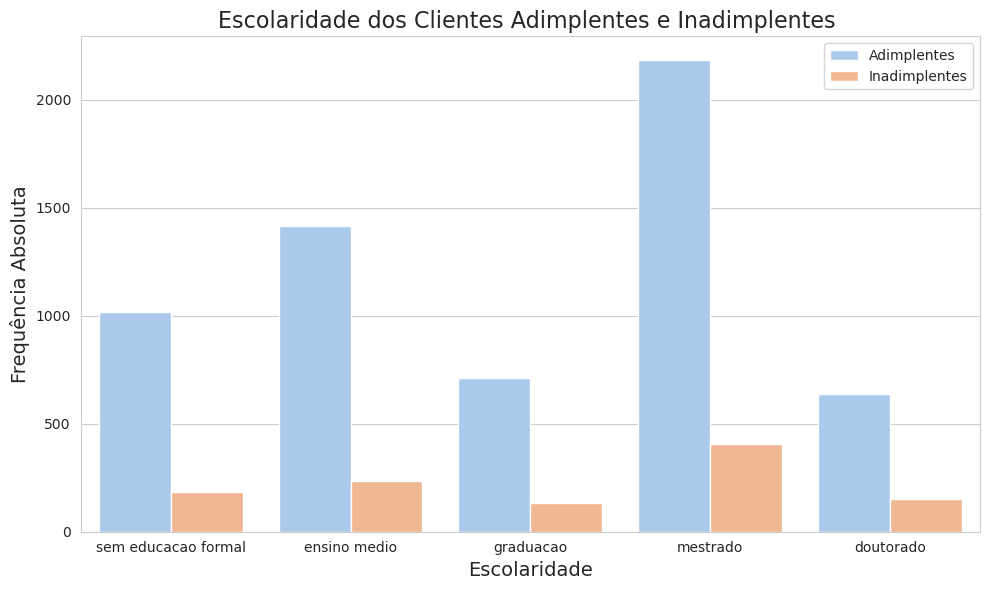

In [28]:
plt.figure(figsize=(10, 6))

ordem_escolaridade = ['sem educacao formal', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']
custom_palette = sns.color_palette("pastel")


ax = sns.countplot(data=df, x="escolaridade", hue="default", order=ordem_escolaridade, palette=custom_palette)
ax.set_title("Escolaridade dos Clientes Adimplentes e Inadimplentes ", fontsize=16)
ax.set_xlabel("Escolaridade", fontsize=14)
ax.set_ylabel("Frequência Absoluta", fontsize=14)

plt.xticks(rotation=0)
plt.legend(labels=["Adimplentes", "Inadimplentes"])
plt.tight_layout()

plt.show()

Para analisar uma possível influência, temos que comparar a proporção entre as duas barras para cada nível de escolaridade. A comparação é feita obtendo a contagem de cada barra, e calculando a razão entre os inadimplentes e adimplentes para cada escolaridade. Isso resultará em 5 valores:

In [29]:
crosstab_df = pd.crosstab(df['escolaridade'], df['default'])

crosstab_df.reset_index(inplace=True)

crosstab_df['ratio'] = crosstab_df[1] / crosstab_df[0]
print(crosstab_df['ratio'])

0    0.238619
1    0.167373
2    0.185393
3    0.185812
4    0.182711
Name: ratio, dtype: float64


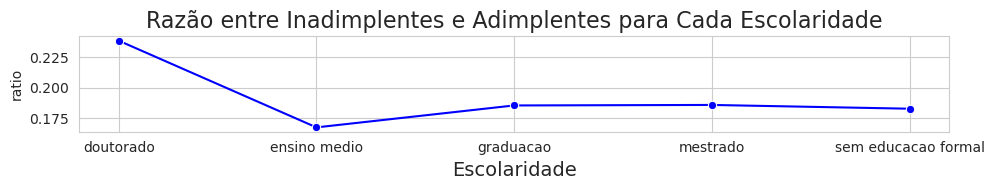

In [30]:
plt.figure(figsize=(10, 2))
sns.lineplot(x=crosstab_df['escolaridade'], y=crosstab_df['ratio'], marker='o', color='blue')
plt.title("Razão entre Inadimplentes e Adimplentes para Cada Escolaridade", fontsize=16)
plt.xlabel("Escolaridade", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

Os 5 valores obtidos acima aproximados para 1 casa decimal são o mesmo: 0.2. Portanto a escolaridade não é um fator relevante na inadimplência dos clientes. 

Agora fazendo a mesma comparação para o salário anual:

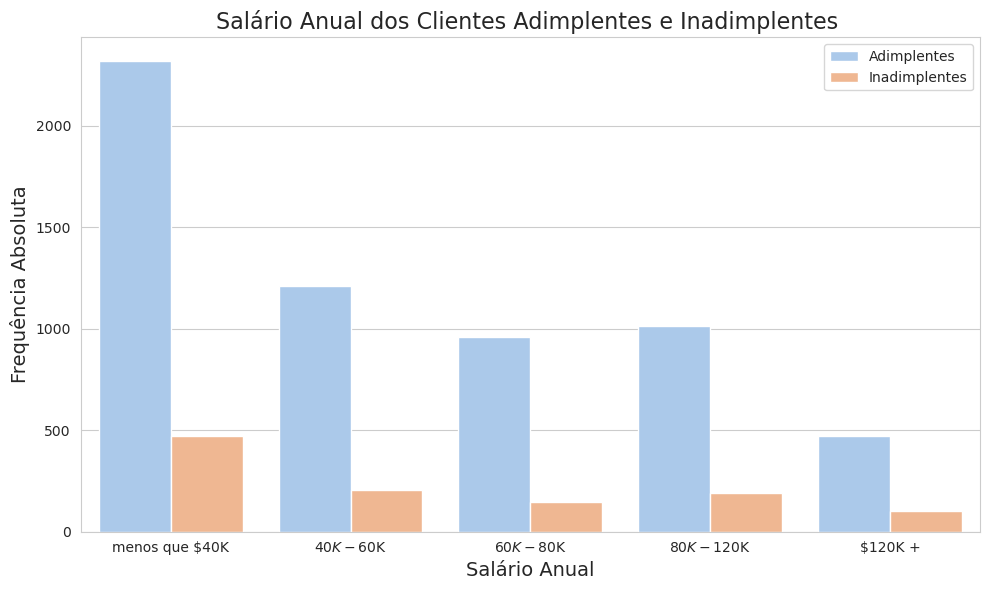

In [31]:
plt.figure(figsize=(10, 6))

custom_colors = sns.color_palette("pastel")
ordem_salario = ['menos que $40K', '$40K - $60K', '$60K - $80K','$80K - $120K', '$120K +']

ax = sns.countplot(data=df, x="salario_anual", hue="default", order=ordem_salario, palette=custom_palette)
ax.set_title("Salário Anual dos Clientes Adimplentes e Inadimplentes ", fontsize=16)
ax.set_xlabel("Salário Anual", fontsize=14)
ax.set_ylabel("Frequência Absoluta", fontsize=14)

plt.xticks(rotation=0)
plt.legend(labels=["Adimplentes", "Inadimplentes"])
plt.tight_layout()

plt.show()

 

In [32]:
crosstab_df2 = pd.crosstab(df['salario_anual'], df['default'])

crosstab_df2.reset_index(inplace=True)

crosstab_df2['ratio'] = crosstab_df2[1] / crosstab_df2[0]
print(crosstab_df2['ratio'])

0    0.217021
1    0.168874
2    0.151357
3    0.186575
4    0.203967
Name: ratio, dtype: float64


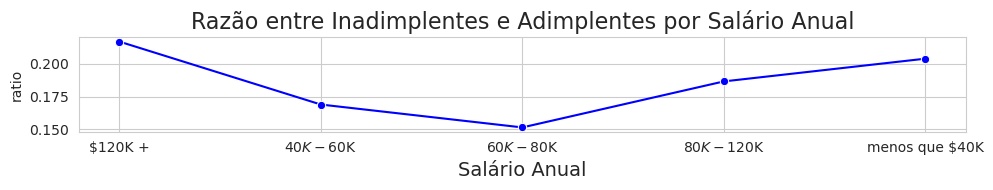

In [33]:
plt.figure(figsize=(10, 2))
sns.lineplot(x=crosstab_df2['salario_anual'], y=crosstab_df2['ratio'], marker='o', color='blue')
plt.title("Razão entre Inadimplentes e Adimplentes por Salário Anual", fontsize=16)
plt.xlabel("Salário Anual", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

Os valores obtidos também aproximam para o mesmo valor: 0.2. Portanto o salário anual também não é um fator relevante na inadimplência. 

Examinando as colunas numéricas:

In [34]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Para a quantidade total de transações em 12 meses, plotamos um histograma para exibir a distribuição dos valores, para adimplentes e inadimplentes, e calculamos a média: 

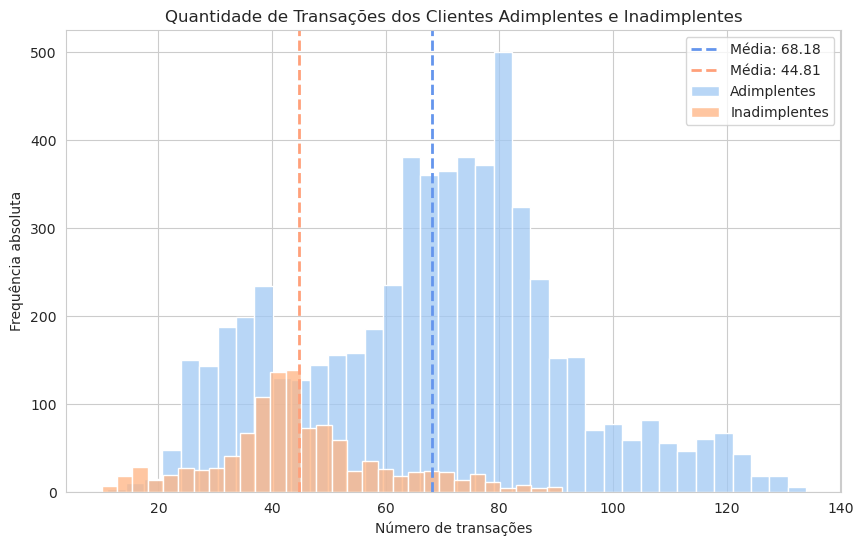

In [35]:
coluna = 'qtd_transacoes_12m'
plt.figure(figsize=(10, 6))

mean_adimplente = df_adimplente[coluna].mean()
mean_inadimplente = df_inadimplente[coluna].mean()

sns.histplot(df_adimplente[coluna], kde=False, label='Adimplentes', color='#a1c9f4')
sns.histplot(df_inadimplente[coluna], kde=False, label='Inadimplentes', color='#ffb482')

plt.axvline(mean_adimplente, color='#6495ED', linestyle='dashed', linewidth=2, label=f'Média: {mean_adimplente:.2f}')
plt.axvline(mean_inadimplente, color='#FFA07A', linestyle='dashed', linewidth=2, label=f'Média: {mean_inadimplente:.2f}')

plt.title("Quantidade de Transações dos Clientes Adimplentes e Inadimplentes")
plt.xlabel("Número de transações")
plt.ylabel("Frequência absoluta")
plt.legend()


plt.show()

É possível observar que nesse caso a diferença é significativa para esses dois grupos, sendo que a quantidade média de transações para os adimplentes é 68.18, e a média para os inadimplentes é 44.81. Isso mostra que os clientes inadimplentes em média realizam menos transações do que os adimplentes. 

A última variável que vamos analisar é o valor total das transações em 12 meses. Novamente um histograma exibe da melhor forma a distribuição desses valores para os grupos. 

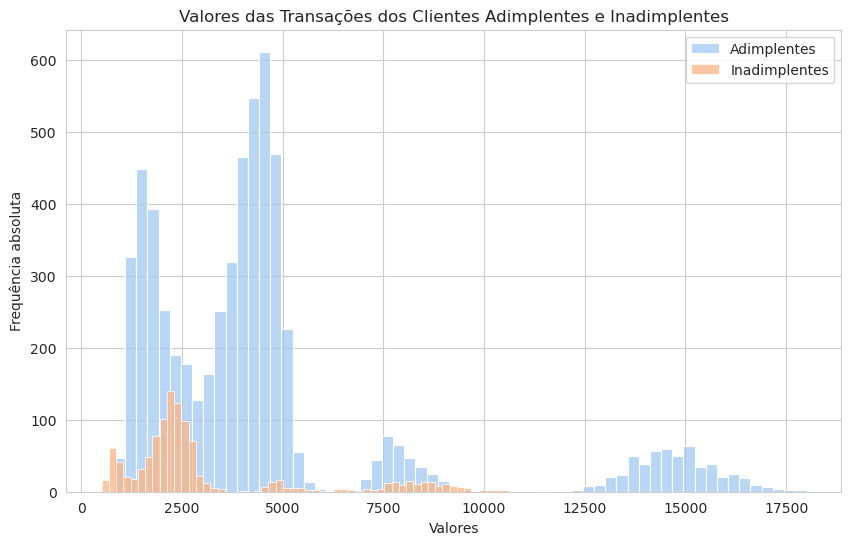

In [36]:
coluna = 'valor_transacoes_12m'
plt.figure(figsize=(10, 6))

sns.histplot(df_adimplente[coluna], kde=False, label='Adimplentes', color='#a1c9f4')
sns.histplot(df_inadimplente[coluna], kde=False, label='Inadimplentes', color='#ffb482')

plt.title("Valores das Transações dos Clientes Adimplentes e Inadimplentes")
plt.xlabel("Valores")
plt.ylabel("Frequência absoluta")
plt.legend()

plt.show()

Observando os histogramas acima é notável que possuem vários picos, ou seja, a distribuição é multimodal nos dois casos. Também notamos que os picos se localizam em valores mais baixos para os clientes inadimplentes, e terminam em torno de 10000, enquanto para os clientes adimplentes ainda existe uma pequena distribuição em torno de 15000.

Por fim com os dados de valores e quantidades de transação podemos plotar um gráfico relacional para visualizar de forma mais clara a relação entre essas variáveis com a inadimplência:

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

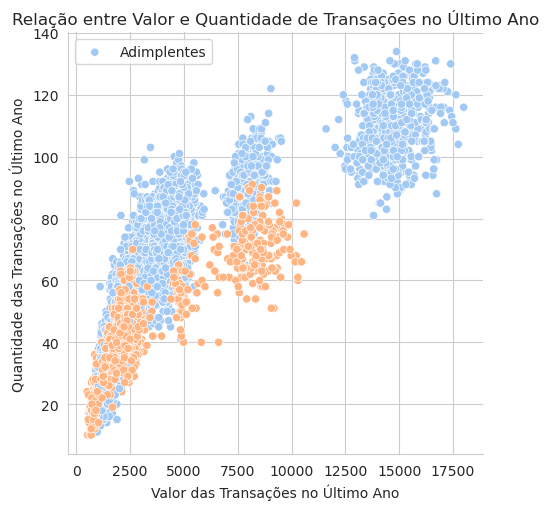

In [37]:
plt.figure()
custom_colors = ["#a1c9f4", "#ffb482"]

sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default', palette=custom_colors, legend=False)

plt.title("Relação entre Valor e Quantidade de Transações no Último Ano")
plt.xlabel("Valor das Transações no Último Ano")
plt.ylabel("Quantidade das Transações no Último Ano")
plt.legend(labels=["Adimplentes", "Inadimplentes"])


plt.show()


Esse gráfico mostra mais claramente o que foi visto nos histogramas, que para os clientes inadimplentes, as transações realizadas durante 12 meses foram em menor número, e de forma geral em menores valores do que as transações dos clientes adimplentes. Também fica claro que o maior volume de transações, em quantidade e valor ocorre exclusivamente para os adimplentes. 

# Conclusão

A escolaridade e salário anual não se mostraram influentes na inadimplência dos clientes, o que é uma consideração importante para evitar que a renda dos clientes ou nível de escolaridade sejam um fator discriminante a ser usado pelos bancos na análise de crédito. 

Clientes adimplentes exclusivamente realizaram a maior quantidade e maior valor de transações do que os clientes inadimplentes. 

Clientes inadimplentes realizaram menos transações e em valor consideravelmente menor do que os adimplentes. 

Esses resultados refletem apenas a base de dados utilizada nessa análise, e não devem ser utilizados para generalizar o perfil de clientes bancários em outras situações. 